This brief tutorial explains some concepts related to the Python library `scikit-learn`. 

# What is Python?

- Python is an interpreted programming language.
- Its name comes from its creator, [Guido van Rossum](https://es.wikipedia.org/wiki/Guido_van_Rossum), who was a fan of the surreal comedy troupe [Monty Python](https://es.wikipedia.org/wiki/Monty_Python).
- Main characteristics:
  - Object oriented programming.
  - Imperative programming.
  - Functional programming.
  - Platform independent and open source.

# Python Integrated Development Environments (IDEs)

- IDEs for Python
  - [Sublime Text](http://www.sublimetext.com/)
  - [PyCharm](https://www.jetbrains.com/pycharm/)
  - [Spyder](https://github.com/spyder-ide/spyder)
  - [Visual Code](https://code.visualstudio.com/)

# `scikit-learn`

- Library providing a wide set of supervised and unsupervised learning algorithms, through a consistent `python` interface.
- Published under BSD license and distributed in many Linux distributions, it favours teaching and commercial use.
- This library is integrated with [`SciPy`](http://www.scipy.org/) (*Scientific Python*), together with other products:
  - [**NumPy**](http://www.numpy.org/)
  - [**Matplotlib**](http://matplotlib.org/)
  - [SymPy](https://simpy.readthedocs.org/en/latest/)
  - [**Pandas**](http://pandas.pydata.org/)

# Features of `scikit-learn`

- This library is focused in constructing the models, not in loading and manipulating data. [NumPy](http://www.numpy.org/) and [Pandas](http://pandas.pydata.org/) are the ones to use for dealing with the data. Some of the things we can do with `scikit-learn` are:
  - Clustering.
  - Cross-validation.
  - Synthetic datasets.
  - Dimensionality reduction.
  - Ensemble methods.
  - Feature selection.
  - Parameter tuning.

- The main advantages of `scikit-learn` include:
  - Consistent API for the different machine learning methods.
  - All methods provide many hyper-parameters to be configured.
  - Awesome documentation.
  - Very active development.
  - Very active community.

Jupyter Notebooks 
==================

* You can run a `Cell` using ``[shift] + [Enter]`` or using the button `Play` in the toolbar.

![](images/ipython_run_cell.png)

* You can obtain help about a function or an object pressing ``[shift] + [tab]`` after the opening brackets ``function(``

![](images/ipython_help-1.png)

* You can also get help by using ``function?``

![](images/ipython_help-2.png)

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn import preprocessing

With these lines, we import the neccesary libraries for our example. `pandas` will be used to read the data, `numpy` will be used to work with data as matrices, `matplotlib` will be used to make the plots and, from `scikit-learn`, in this case, we will use a classification method based on the nearest neigbours and some preprocessing functions.

## matplotlib

A very important part of machine learning is data visualization. The most common tool for that in Python is [`matplotlib`](http://matplotlib.org). It is a very flexible package and we will study now some of its elements.

Given that we are using Jupyter notebooks, we need to consider one the [magic commands](https://ipython.org/ipython-doc/3/interactive/magics.html) of IPython, the "*matoplotlib inline*" mode, which will *plots* directly on the notebook.

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

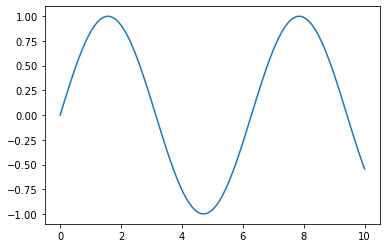

In [4]:
# Drawing a line
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x));

In Python, generally, it is not needed to use ';' at the end of every line. However, when drawing an *inline* plot, we can use ';' to avoid seeing the normal output of *matplotlib* and to see only the figure.
Try to run the previous example but removing the ';'. What difference do you see?

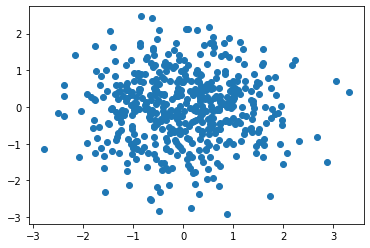

In [5]:
# Drawing a scatter
x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.scatter(x, y);

In [6]:
# Showing the images using imshow
x = np.linspace(1, 12, 100)
y = x[:, np.newaxis]

The numpy method `np.newaxis` creates a new axis in the array. Try to print the dimensionality of `x` and `y` using the numpy method `.shape` and check the difference.

(100, 100)


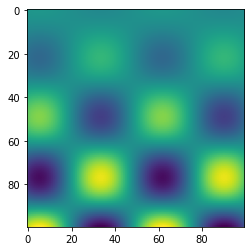

In [7]:
im = y * np.sin(x) * np.cos(y)
print(im.shape)

# - The default origin is at the upper left part
plt.imshow(im);

What can you see in the image?

It is a mix of sin and cosine functions.

If you have any doubts, you can always [ask Google](https://www.google.es/search?dcr=0&ei=cGr8WbKFNsmTa_b1n6AI&q=sin%28x%29*cos%28y%29+from+-6+to+6&oq=sin%28x%29*cos%28y%29+from+-6+to+6&gs_l=psy-ab.3...5574.8328.0.8486.6.5.1.0.0.0.79.355.5.5.0....0...1.1.64.psy-ab..0.0.0....0.3Kq-XpUPDRs)


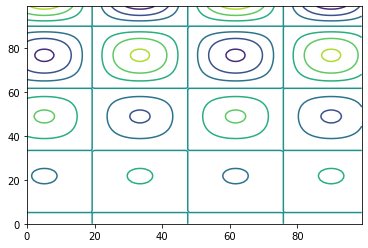

In [8]:
# Prepare a countour plot
# - The origin now is at the bottom left part
plt.contour(im);

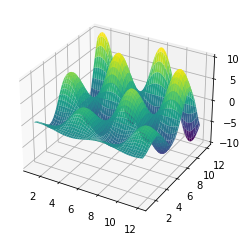

In [9]:
# 3D Plot
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
xgrid, ygrid = np.meshgrid(x, y)
ax.plot_surface(xgrid, ygrid, im, cmap=plt.cm.viridis, cstride=2, rstride=2, linewidth=0);

There are many plots available. You can explore them by using the [matplotlib gallery](http://matplotlib.org/gallery.html).

Try some of the examples, such as this one `https://matplotlib.org/mpl_examples/shapes_and_collections/path_patch_demo.py`:


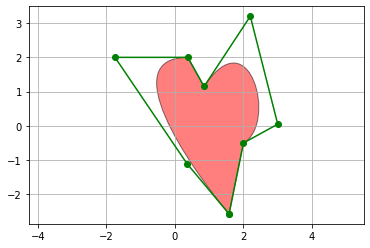

In [10]:
"""
Demo of a PathPatch object.
"""
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()


# Some samples with the `iris` dataset

We are going to use a typical example in *machine learning* tutorials, the `iris` dataset. In this dataset, there are three classes to be predicted, which are three different species of the iris flower, in such a way that, for every flower, four measurements or input variables are extracted (petal and sepal length and width, in cm). The three species to be predicted are iris *setosa*, iris *virginica* and iris *versicolor*.

## Reading data

As previously discussed, we will use [Pandas](http://pandas.pydata.org/) to read data. This library has a method, `read_csv`, which is able to read data from a `csv` file.

The method `read_csv` from `pandas` can be used in two ways: the csv file can have a row with the name of the variables or we can specify the names of the variables as an argument. In this case, we will use the second mode. We create an *array* with the name of the variables:

In [11]:
name_variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

and we read the array with:

In [12]:
iris = pd.read_csv('data/iris.csv', names = name_variables)

`iris` is an object of the class [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) from `pandas`. We could have considered `header=None`, in such a way that `read_csv` would have assigned a default name.

## Inspecting the data

Before anything, it is important to start with an **inspection** of the data. If we just want to see the header of the dataset, we can use the method `head(n)`, which return a `DataFrame` with the first `n` patterns:

In [13]:
print(iris.head(9))

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa


These data have four dimensions, but we can visualize one or two of these dimensions using a histogram or a scatter. First, we activate the *matplotlib inline* mode:

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

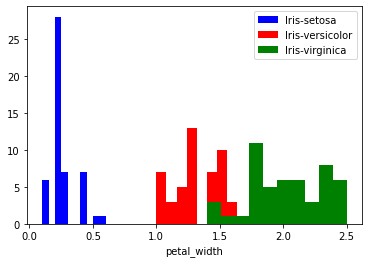

In [15]:
variable_x = 3
colors = ['blue', 'red', 'green']
iris_target_names = np.unique(iris['class'])

for index, color in zip(range(len(iris_target_names)), colors): # what does zip do?
    #We separate the set of every class
    patterns = (iris['class']==iris_target_names[index]) # This comparison will be explained later
    plt.hist(iris.values[patterns, variable_x], label=iris_target_names[index], color=color)

plt.xlabel(name_variables[variable_x])
plt.legend(loc='upper right')
plt.show()

Remember that the variables were *['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']*, can you modify the previous code to show the sepal_length

Now we are going to show in a plot the relationship between two input variables, so that we can see if the characteristics of the patterns make them linearly separable. You can try different combinations of the variables by modifying the values of *variable_x* and *variable_y*.

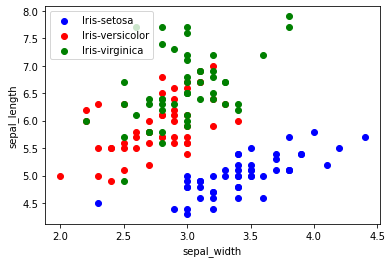

In [16]:
variable_x = 1 
variable_y = 0

colors = ['blue', 'red', 'green']

for indice, color in zip(range(len(iris_target_names)), colors):
    patterns = (iris['class']==iris_target_names[indice])
    plt.scatter(iris.values[patterns, variable_x], 
                iris.values[patterns, variable_y],
                label=iris_target_names[indice],
                c=color)

plt.xlabel(name_variables[variable_x])
plt.ylabel(name_variables[variable_y])
plt.legend(loc='upper left')
plt.show()

Have you found a good combination of the variables?
It is tedious to try all the combinations, and we have few variables in this example!

### Scatterplot matrices

Instead of creating separated scatterplots, data scientists usually consider **scatterplot matrices**.

These matrices show the scatter plots between all the features of the dataset, together with the histograms to see the distributions of all features.

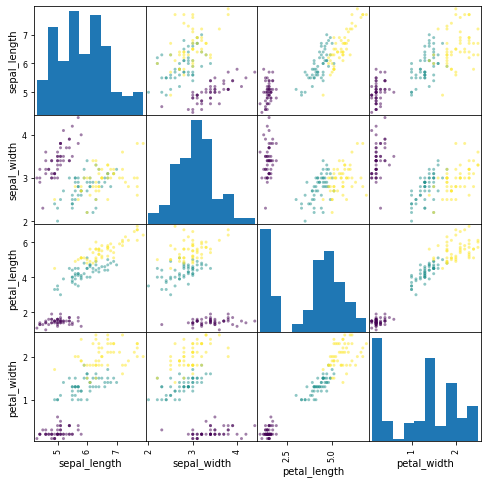

In [17]:
import pandas as pd
from sklearn import preprocessing
from pkg_resources import parse_version
le = preprocessing.LabelEncoder()
le.fit(iris['class'])
class_numbers = le.transform(iris['class'])

iris_df = pd.DataFrame(iris[name_variables], columns=name_variables)

#For pandas>0.16 the method has to be called differently
if(parse_version(pd.__version__) > parse_version('0.16')):
    pd.plotting.scatter_matrix(iris_df, c=class_numbers, figsize=(8, 8));
else:
    pd.tools.plotting.scatter_matrix(iris_df, c=class_numbers, figsize=(8, 8));


## Working with numpy matrices (`ndarray`)  and `DataFrame` objects

[`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) objects are the *datasets* the we are going to use. They can perform a lot of operations automatically, helping to transform the variables very easilly. Internally, the dataset is stored as 2D array of `numpy` (class [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)). The access of the elements in a [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) is a bit easier than using the [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) version. We can use the attribute `values` for accessing the `numpy` object:

In [18]:
print(iris['sepal_length'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64


In [19]:
print(iris[name_variables[0]])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64


In [20]:
iris_array = iris.values
print(iris_array[:,0])

[5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


The syntax for indexing an [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) object is the following one:
- `array[i,j]`: value of row `i` column `j`.
- `array[i:j,k]`: another `ndarray` with the submatrix containing the rows from `i` to `j-1` and column `k`.
- `array[i:j,k:l]`: another `ndarray` with the submatrix containing the rows from `i` to `j-1` and columns from `k` to `l-1`.
- `array[i:j,:]`: another `ndarray` with the submatrix containing the rows from `i` to `j-1` and **all** the columns`.
- `array[:,i:j]`: another `ndarray` with the submatrix containing **all** the rows and columns from `i` to `j-1`.

In [21]:
# Showing the array is less fancy
iris_array[0:2,2:4]

array([[1.4, 0.2],
       [1.4, 0.2]], dtype=object)

In [22]:
# The "pandas" way is always better looking
iris[0:2][name_variables[2:4]]

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2


In [23]:
iris_array[1:6,:]

array([[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa']], dtype=object)

In [24]:
iris[1:6][name_variables[:]]

,sepal_length,sepal_width,petal_length,petal_width,class
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


Access to the `ndarray` is, in general, a bit easier, because we do not require the name of the variables. Now, we are going to play with a matrix of random numbers, to see some additional features.

In [25]:
import numpy as np

# Random number seed (for reproducibility)
rnd = np.random.RandomState(seed=123)

# Generating a random matrix
X = rnd.uniform(low=0.0, high=1.0, size=(3, 5))  # 3x5 dimensional

print(X)

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]
 [0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
 [0.34317802 0.72904971 0.43857224 0.0596779  0.39804426]]


(note that arrays in numpy are indexed starting from 0, as almost all structures in Python)

In [26]:
# Access to the elements

# Obtaining a single element
# (first row, first column)
print(X[0, 0])

# Obtaining a row
# (second row)
print(X[1])

# Obtaining a column
# (second column)
print(X[:, 1])

0.6964691855978616
[0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
[0.28613933 0.9807642  0.72904971]


$$\begin{bmatrix}
    1 & 2 & 3 & 4 \\
    5 & 6 & 7 & 8
\end{bmatrix}^T
= 
\begin{bmatrix}
    1 & 5 \\
    2 & 6 \\
    3 & 7 \\
    4 & 8
\end{bmatrix}
$$



In [27]:
# Obtaining the transpose
print(X.T)

[[0.69646919 0.42310646 0.34317802]
 [0.28613933 0.9807642  0.72904971]
 [0.22685145 0.68482974 0.43857224]
 [0.55131477 0.4809319  0.0596779 ]
 [0.71946897 0.39211752 0.39804426]]


In [28]:
# Create a row vector of numbers with same separation in a predefined range
y = np.linspace(start=0, stop=12, num=5)
print(y)

[ 0.  3.  6.  9. 12.]


In [29]:
# Transform the row vector into a column vector
print(y[:, np.newaxis])

[[ 0.]
 [ 3.]
 [ 6.]
 [ 9.]
 [12.]]


In [30]:
# Obtain the shape of an array and modify it

# Random array
rnd = np.random.RandomState(seed=123)
X = rnd.uniform(low=0.0, high=1.0, size=(3, 5))  # a 3 x 5 array

print(X)
print(X.shape)
print(X.reshape(5, 3))

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]
 [0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
 [0.34317802 0.72904971 0.43857224 0.0596779  0.39804426]]
(3, 5)
[[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319 ]
 [0.39211752 0.34317802 0.72904971]
 [0.43857224 0.0596779  0.39804426]]


In [31]:
# Indexing according to a set of given numbers
indices = np.array([3, 1, 0])
print(indices)
X[:, indices]

[3 1 0]


array([[0.55131477, 0.28613933, 0.69646919],
       [0.4809319 , 0.9807642 , 0.42310646],
       [0.0596779 , 0.72904971, 0.34317802]])

## Vectorizing operations

In `scikit-learn`, as in other programming languages such as R or Matlab, we have to try, when possible, to *vectorize* operations. That is, using matrix operations instead of loops that iterate over the arrays. The reason is that this type of operations are much more optimized and that the process of referencing *arrays* can take a lot time.

Imagine that we want to print the sepal area of all the flowers. Compare the difference between a `for` loop and matrix operations:

In [32]:
# Generating an array with sepal area (length*width), using a for:

# Create an empty array
sepalAreaArray = np.empty(iris_array.shape[0])

# For loop
for i in range(iris_array.shape[0]):
    sepalAreaArray[i] = iris_array[i,0] * iris_array[i,1]
    
print(sepalAreaArray)

[17.85 14.7  15.04 14.26 18.   21.06 15.64 17.   12.76 15.19 19.98 16.32
 14.4  12.9  23.2  25.08 21.06 17.85 21.66 19.38 18.36 18.87 16.56 16.83
 16.32 15.   17.   18.2  17.68 15.04 14.88 18.36 21.32 23.1  15.19 16.
 19.25 15.19 13.2  17.34 17.5  10.35 14.08 17.5  19.38 14.4  19.38 14.72
 19.61 16.5  22.4  20.48 21.39 12.65 18.2  15.96 20.79 11.76 19.14 14.04
 10.   17.7  13.2  17.69 16.24 20.77 16.8  15.66 13.64 14.   18.88 17.08
 15.75 17.08 18.56 19.8  19.04 20.1  17.4  14.82 13.2  13.2  15.66 16.2
 16.2  20.4  20.77 14.49 16.8  13.75 14.3  18.3  15.08 11.5  15.12 17.1
 16.53 17.98 12.75 15.96 20.79 15.66 21.3  18.27 19.5  22.8  12.25 21.17
 16.75 25.92 20.8  17.28 20.4  14.25 16.24 20.48 19.5  29.26 20.02 13.2
 22.08 15.68 21.56 17.01 22.11 23.04 17.36 18.3  17.92 21.6  20.72 30.02
 17.92 17.64 15.86 23.1  21.42 19.84 18.   21.39 20.77 21.39 15.66 21.76
 22.11 20.1  15.75 19.5  21.08 17.7 ]


In [33]:
# Generating an array with sepal area (length*width), using matrix operations:
sepalAreaArray = iris_array[:,0] * iris_array[:,1]
print (sepalAreaArray)

[17.849999999999998 14.700000000000001 15.040000000000001 14.26 18.0
 21.060000000000002 15.639999999999999 17.0 12.76 15.190000000000001
 19.980000000000004 16.32 14.399999999999999 12.899999999999999 23.2
 25.080000000000002 21.060000000000002 17.849999999999998 21.66 19.38
 18.36 18.87 16.56 16.83 16.32 15.0 17.0 18.2 17.68 15.040000000000001
 14.879999999999999 18.36 21.32 23.1 15.190000000000001 16.0 19.25
 15.190000000000001 13.200000000000001 17.34 17.5 10.35 14.080000000000002
 17.5 19.38 14.399999999999999 19.38 14.719999999999999 19.61 16.5
 22.400000000000002 20.480000000000004 21.39 12.649999999999999 18.2
 15.959999999999999 20.79 11.76 19.139999999999997 14.040000000000001 10.0
 17.700000000000003 13.200000000000001 17.689999999999998 16.24 20.77
 16.799999999999997 15.66 13.640000000000002 14.0 18.880000000000003 17.08
 15.75 17.08 18.56 19.799999999999997 19.04 20.1 17.4 14.82 13.2 13.2
 15.66 16.200000000000003 16.200000000000003 20.4 20.77 14.489999999999998
 16.79999

What is more, `ndarray` accept logical operations that return the `ndarray` resulting from applying the logical operation over all the elements:
*Which patterns have the petal length (variable 2) higher than 5 units?*

In [34]:
iris_array[:,2] > 5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

What is more, this `ndarray` can be used to index the original `ndarray`:
*Which is the class of the patterns that have the petal length (variable 2) higher than 5 units?*

In [35]:
iris_array[iris_array[:,2] > 5,4]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

Imagine now that we want to print the sepal length of the flowers whose sepal length is higher than 2. Compare the `for` version and the vectorized version:

In [36]:
# Print the sepal length higher than 2, using a for:
iris_array = iris.values
for i in range(0,iris_array.shape[0]):
    valueSepal = iris_array[i,0]
    if valueSepal > 2:
        print(valueSepal)

5.1
4.9
4.7
4.6
5.0
5.4
4.6
5.0
4.4
4.9
5.4
4.8
4.8
4.3
5.8
5.7
5.4
5.1
5.7
5.1
5.4
5.1
4.6
5.1
4.8
5.0
5.0
5.2
5.2
4.7
4.8
5.4
5.2
5.5
4.9
5.0
5.5
4.9
4.4
5.1
5.0
4.5
4.4
5.0
5.1
4.8
5.1
4.6
5.3
5.0
7.0
6.4
6.9
5.5
6.5
5.7
6.3
4.9
6.6
5.2
5.0
5.9
6.0
6.1
5.6
6.7
5.6
5.8
6.2
5.6
5.9
6.1
6.3
6.1
6.4
6.6
6.8
6.7
6.0
5.7
5.5
5.5
5.8
6.0
5.4
6.0
6.7
6.3
5.6
5.5
5.5
6.1
5.8
5.0
5.6
5.7
5.7
6.2
5.1
5.7
6.3
5.8
7.1
6.3
6.5
7.6
4.9
7.3
6.7
7.2
6.5
6.4
6.8
5.7
5.8
6.4
6.5
7.7
7.7
6.0
6.9
5.6
7.7
6.3
6.7
7.2
6.2
6.1
6.4
7.2
7.4
7.9
6.4
6.3
6.1
7.7
6.3
6.4
6.0
6.9
6.7
6.9
5.8
6.8
6.7
6.7
6.3
6.5
6.2
5.9


In [37]:
# Print the sepal length higher than 2, using matrix operations:
print(iris_array[ iris_array[:,0] > 2, 0])

[5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


We can use other additional functions with `ndarray`. For example, the functions [`numpy.mean`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) and [`numpy.std`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html) which calculate the mean and the standard deviation of the `ndarray`.

Finally, we can apply matrix operations over the `ndarray` in a very easy and optimized way. The function [`numpy.dot`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) multiplies two `ndarray`, provided that their dimensions are compatible. The function [`numpy.transpose`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) returns the transpose.

In [38]:
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]

np.dot(a, b)

array([[4, 1],
       [2, 2]])

In [39]:
x = np.arange(4).reshape((2,2))
x

array([[0, 1],
       [2, 3]])

In [40]:
np.transpose(x)

array([[0, 2],
       [1, 3]])

In [41]:
x.T

array([[0, 2],
       [1, 3]])

**Exercise**: Try to print the average and the standard deviation of the area of those flowers which are *virginica*.

## Dividing the data in training and test

Although sometimes we will get the training/test split, knowing dataset spliting tools and alternatives still a common routine for machine learning practitioners. The following code shows a function which randomly divides the dataset, using *vectorized* operations:

In [42]:
def train_test_split(dataframe, percentage=0.6):
    """ 
    Function which randomly divide the dataset in training and test
    It receives the following parameters:
    - dataframe: DataFrame to be divided
    - percentage: percentage of training
    Returns:
    - train: DataFrame with training data
    - test: DataFrame with test data
    """
    mask = np.random.rand(len(dataframe)) < percentage
    train = dataframe[mask]
    test = dataframe[~mask] # what ~ does?
    return train, test

In [43]:
iris_train, iris_test = train_test_split(iris)

Now, we can keep the variables corresponding to the inputs (all but the last one) and the output (in this case, the last one):

In [44]:
train_inputs_iris = iris_train.values[:,0:-1]
train_outputs_iris = iris_train.values[:,-1]

test_inputs_iris = iris_test.values[:,0:-1]
test_outputs_iris = iris_test.values[:,-1]

print(train_inputs_iris.shape)

(98, 4)


If we are given the complete dataset to perform the partitions and the validation, all the functions of the module [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) from `scikit-learn` can be very helpful (do pay attention to the alternatives for stratification!).

In [45]:
from sklearn.model_selection import train_test_split

inputs_iris = iris.values[:,0:-1]
outputs_iris = iris.values[:,-1]

train_inputs_iris, test_inputs_iris, train_outputs_iris, test_outputs_iris = \
       train_test_split(inputs_iris, outputs_iris, test_size=0.33, random_state=42, stratify=outputs_iris)

print(train_inputs_iris.shape)
print(test_inputs_iris.shape)
print([sum(train_outputs_iris==label)/train_outputs_iris.shape[0] for label in np.unique(outputs_iris)])

(100, 4)
(50, 4)
[0.34, 0.33, 0.33]


## Preprocessing

`scikit-learn` does not allow to use strings for datasets, everything must be a number. For transforming the data, we can use the class [`sklearn.preprocessing.LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), which automatically converts from string to number. It is used in the following way:

In [46]:
# Creating the object
label_e = preprocessing.LabelEncoder()

# 'Training' the encoder 
label_e.fit(train_outputs_iris)

# Applying the conversion
train_outputs_iris_encoded = label_e.transform(train_outputs_iris)
test_outputs_iris_encoded = label_e.transform(test_outputs_iris)
print(train_outputs_iris_encoded)

[2 0 2 1 0 0 0 2 0 0 1 0 1 1 2 2 0 0 2 0 2 0 0 2 0 1 2 1 0 1 0 2 1 2 1 0 2
 0 2 0 1 1 0 2 1 1 0 2 1 2 0 1 0 2 1 1 1 1 1 1 2 1 2 2 0 2 1 1 2 0 2 2 2 0
 2 0 0 2 2 2 0 1 2 2 0 1 1 1 1 1 0 2 1 2 0 0 1 0 1 0]


As can be observed, we first create the `LabelEncoder` and then it is trained using the method `fit`. For a `LabelEncoder`, "training" means establishing the mapping for the labels, in this case:
- `Iris-setosa` -> 0
- `Iris-versicolor` -> 1
- `Iris-virginica` -> 2

Once trained, we can call to the method `transform` of the `LabelEncoder` to transform any `ndarray` (we would have an error if a test label is new). This API (`fit` method plus `transform` or `predict` method) is common to almost all `scikit-learn` classes.

There are many more preprocessing tasks that can be done in `scikit-learn`. Check the module [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

## Creating and evaluating a classifier

Now, we are going to create a classification model and obtain the corresponding confusion matrix. We will use the classifier [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), which classifies every pattern by assigning the majority class according to the `k` nearest neighbours with respect to pattern to be classified. You should **always read the documentation** to know more about the parameters of the algorithm, which are always specified in the constructor (in this case, the most important parameter is `n_neighbors`). Let see how the training would be performed:

In [47]:
knn = neighbors.KNeighborsClassifier()
knn.fit(train_inputs_iris, train_outputs_iris_encoded)
print(knn)

KNeighborsClassifier()


The model is trained. This is a *lazy* model, in the sense that there are no parameters to be adjusted during training. The `fit` method only adjust some data structures for the input data, which facilitate the calculation of distances when predicting the label of new data. If we want to obtain the test labels, we can make use of the method `predict`, which applies an already trained model to new data:

In [48]:
test_prediction = knn.predict(test_inputs_iris)
print(test_prediction)
print(test_outputs_iris_encoded)

[2 1 0 1 2 1 1 0 1 1 0 0 0 0 0 2 2 1 2 1 2 1 0 2 0 2 2 0 0 2 2 2 0 1 0 0 2
 1 1 1 1 1 0 0 2 1 2 1 1 2]
[2 1 0 1 2 1 1 0 1 1 0 0 0 0 0 2 2 1 2 1 2 1 0 2 0 2 2 0 0 2 2 2 0 1 0 0 2
 1 1 1 1 1 0 0 2 1 2 2 1 2]


If we want to know how good the classification has been, every regression or classification model in `scikit-learn` has a method called `score`, which returns the goodness of model predictions against the targets expected, based on the test inputs. The default evaluation metric for [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) is the accuracy (or Correctly Classified Ration, CCR). The function is used in the following way (internally, this function calls to `predict`):

In [49]:
accuracy = knn.score(test_inputs_iris, test_outputs_iris_encoded)
accuracy

0.98

This is similar to perform the comparison and calculate the average (vectorized operations):

In [50]:
np.mean(test_prediction == test_outputs_iris_encoded)

0.98

To print the confusion matrix of the prediction, we can use the function [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix):

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_outputs_iris_encoded, test_prediction)
print(cm)

[[16  0  0]
 [ 0 17  0]
 [ 0  1 16]]


## Configuring the parameters of a classifier

Imagine that you want to set the number of neighbours (`n_neighbors`) in such a way that training accuracy is as high as possible. This can be done in the following way:

In [52]:
for nn in range(1,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=nn)
    knn.fit(train_inputs_iris, train_outputs_iris_encoded)
    train_accuracy = knn.score(train_inputs_iris, train_outputs_iris_encoded)
    test_accuracy = knn.score(test_inputs_iris, test_outputs_iris_encoded)
    print("%d neighbours: \tTrain CCR = %.2f%%, \tTest CCR = %.2f%%" % (nn, train_accuracy*100, test_accuracy*100))

1 neighbours: 	Train CCR = 100.00%, 	Test CCR = 94.00%
2 neighbours: 	Train CCR = 99.00%, 	Test CCR = 92.00%
3 neighbours: 	Train CCR = 96.00%, 	Test CCR = 96.00%
4 neighbours: 	Train CCR = 98.00%, 	Test CCR = 96.00%
5 neighbours: 	Train CCR = 96.00%, 	Test CCR = 98.00%
6 neighbours: 	Train CCR = 95.00%, 	Test CCR = 94.00%
7 neighbours: 	Train CCR = 97.00%, 	Test CCR = 98.00%
8 neighbours: 	Train CCR = 97.00%, 	Test CCR = 96.00%
9 neighbours: 	Train CCR = 97.00%, 	Test CCR = 96.00%
10 neighbours: 	Train CCR = 97.00%, 	Test CCR = 96.00%
11 neighbours: 	Train CCR = 98.00%, 	Test CCR = 96.00%
12 neighbours: 	Train CCR = 98.00%, 	Test CCR = 96.00%
13 neighbours: 	Train CCR = 98.00%, 	Test CCR = 94.00%
14 neighbours: 	Train CCR = 98.00%, 	Test CCR = 96.00%


# Exercise to be prepared

You have to use the dataset `german` to train two supervised classification models:
- One based on the `k` nearest neighbours: [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
- One based on linear logistic regression: [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

The dataset is in the UCI, with the name [*Statlog (German Credit Data) Data Set*](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29). Download it and preprocess it to perform the training. Divide the data in 60% for training and 40% for test (use the function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)). You have to normalize all the input variables into the range `[0,1]` (learn about [MinMaxScaler](http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range)). Try to adjust as better as possible the parameters of the classifiers.

# References
This tutorial is mainly based on the following material:
- Python como alternativa a R en *machine learning*. Mario Pérez Esteso. [Enlace a Github](https://github.com/MarioPerezEsteso/Python-Machine-Learning). [Enlace a Youtube](https://www.youtube.com/watch?v=8yz4gWt7Klk). 
- Tutorial from Alex Gramfort and Andreas Mueller [[Github]](https://github.com/amueller/scipy-2018-sklearn)[[Youtube1]](https://www.youtube.com/watch?v=2kT6QOVSgSg)[[Youtube2]](https://www.youtube.com/watch?v=WLYzSas511I)

If you want to learn more about `scikit-learn`:
- *An introduction to machine learning with scikit-learn*. Official documentation from `scikit-learn`. [http://scikit-learn.org/stable/tutorial/basic/tutorial.html](http://scikit-learn.org/stable/tutorial/basic/tutorial.html).
- *A tutorial on statistical-learning for scientific data processing*. Official documentation from `scikit-learn`. [http://scikit-learn.org/stable/tutorial/statistical_inference/index.html](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html).

Finally, to learn the basic syntax of Python in less than 13 hours, you can use the following course in *CodeAcademy*:
- Python course of CodeAcademy. [https://www.codecademy.com/es/learn/python](https://www.codecademy.com/es/learn/python)